<a href="https://colab.research.google.com/github/jocelynbaduria/Assignment-3-_part_a_b_c.ipynb/blob/main/Jocelyn_Baduria_Assignment_3_part_b3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# B3. Pytorch
With auto differentiation high level primitive

In [276]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [277]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [278]:
!pip3 install torch torchvision

In [279]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

1. Generate data: 3 dimensions input and 2 dimensions output

In [280]:
# Make non-linear data, using 3 dimensional input data and 2 output neurons
n_samples = 200
d1 = 3
d2 = 3
x = torch.FloatTensor(n_samples, d1).uniform_(-1,1)
y = torch.FloatTensor(n_samples, d2).uniform_(-1,1)

x_un = 0.1 * x
weights_true = torch.FloatTensor([[5, 1, 4],[2, 1, 2]]).T
bias_true = torch.tensor([0.5, 0.25])

# # y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + b
y_true = torch.mm(x ** 2, weights_true) + torch.mm(x, weights_true) + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')
# #x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)

x: torch.Size([200, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2]), y: torch.Size([200, 2])


2. Add Linear function using 10samples training input and two samples for training output

In [281]:
y = torch.tensor(y).unsqueeze(1) # <1>
x = torch.tensor(x).unsqueeze(1) # <1>

n_samples = x.shape[0] 
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


(tensor([124, 113, 198,  64,   5,  97,  95, 106, 151, 144,  78,  79,  17,
         152, 103, 146,  20, 121,  88,  87, 186, 187, 104, 118, 120,  77,
         178, 112, 181, 142, 194,  42, 155,  31,  69, 110,  55,  89, 140,
          65,  68, 159, 175, 105, 167, 108, 134, 161,  92, 172, 117, 195,
         193,   3,  38,  82,   6, 114,  25, 127, 149, 145,  37,  46, 125,
         100, 133, 126,  41,  99,  35, 176,  59, 180, 136, 101,   8,  13,
         158,  43,  74, 150,  86, 156,  34,   9,  44,  61, 191,  60, 154,
          70, 169,   1, 170,  51,   2, 188,  18,  33,  26,  75,   4, 184,
         141, 131, 116, 153,  93,  53, 132, 173, 166,  54,  90,  14,  47,
         143,  22,  15,  23,  16,  29,  81, 182, 168,  94,  50,  12,  67,
         162, 128,  40,  66,  28,  58,   7,  36, 171,  19,  57, 196, 185,
         197, 148, 135, 177,  63,  10, 199,  83, 190,  30, 157,  39,  91,
         123, 163, 107,  45]),
 tensor([139, 192, 130,  73,  72,  71,  56, 179, 189, 102, 147, 160, 119,
       

In [282]:
x_train = x[train_indices] # x
y_train = y[train_indices] # y

x_val = x[val_indices] # x
y_val = y[val_indices] # y

x_train = 0.1 * x_train 
x_val = 0.1 * x_val

In [283]:
import torch.nn as nn

linear_model = nn.Linear(3, 1, 2) # <1>
linear_model(x_val)

tensor([[[-0.5230]],

        [[-0.4914]],

        [[-0.5312]],

        [[-0.5585]],

        [[-0.5552]],

        [[-0.5380]],

        [[-0.4856]],

        [[-0.5033]],

        [[-0.5190]],

        [[-0.5249]],

        [[-0.5735]],

        [[-0.5027]],

        [[-0.5394]],

        [[-0.5539]],

        [[-0.5365]],

        [[-0.5188]],

        [[-0.5531]],

        [[-0.5342]],

        [[-0.5091]],

        [[-0.5751]],

        [[-0.5334]],

        [[-0.5223]],

        [[-0.5328]],

        [[-0.5335]],

        [[-0.4979]],

        [[-0.5393]],

        [[-0.5820]],

        [[-0.5774]],

        [[-0.5350]],

        [[-0.5471]],

        [[-0.5381]],

        [[-0.5158]],

        [[-0.4919]],

        [[-0.5842]],

        [[-0.5474]],

        [[-0.5476]],

        [[-0.5424]],

        [[-0.5812]],

        [[-0.5718]],

        [[-0.5684]]], grad_fn=<AddBackward0>)

In [284]:
linear_model.weight

Parameter containing:
tensor([[-0.0677,  0.3199, -0.2891]], requires_grad=True)

In [285]:
linear_model.bias

Parameter containing:
tensor([-0.5304], requires_grad=True)

In [286]:
x = torch.ones(3)
linear_model(x)

tensor([-0.5672], grad_fn=<AddBackward0>)

In [287]:
x = torch.ones(10, 3)
linear_model(x)

tensor([[-0.5672],
        [-0.5672],
        [-0.5672],
        [-0.5672],
        [-0.5672],
        [-0.5672],
        [-0.5672],
        [-0.5672],
        [-0.5672],
        [-0.5672]], grad_fn=<AddmmBackward>)

In [288]:
linear_model = nn.Linear(3, 1, 2) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [289]:
linear_model.parameters()

<generator object Module.parameters at 0x7fe1220b0250>

In [290]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.0486,  0.1934, -0.0627]], requires_grad=True),
 Parameter containing:
 tensor([0.1820], requires_grad=True)]

3. Training Loop Function

In [291]:
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, x_val,
                  y_train, y_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(x_train) # <1>
        loss_train = loss_fn(t_p_train, y_train)

        t_p_val = model(x_val) # <1>
        loss_val = loss_fn(t_p_val, x_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

4. Compute Cost Function

In [292]:
def loss_fn(t_p, y):
    squared_diffs = (t_p - y)**2
    return squared_diffs.mean()

linear_model = nn.Linear(3, 1, 2) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    x_train = x_train,
    x_val = x_val, 
    y_train = y_train,
    y_val = y_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 0.4594, Validation loss 0.1039
Epoch 1000, Training loss 0.3443, Validation loss 0.0055
Epoch 2000, Training loss 0.3439, Validation loss 0.0055
Epoch 3000, Training loss 0.3436, Validation loss 0.0055

Parameter containing:
tensor([[ 0.3772, -0.1580, -0.3925]], requires_grad=True)
Parameter containing:
tensor([-0.0134], requires_grad=True)


In [293]:
linear_model = nn.Linear(3, 1, 2)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    x_train = x_train,
    x_val = x_val, 
    y_train = y_train,
    y_val = y_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 0.3603, Validation loss 0.0261


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([160, 1, 3])) that is different to the input size (torch.Size([160, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([40, 1, 3])) that is different to the input size (torch.Size([40, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1000, Training loss 0.3454, Validation loss 0.0060
Epoch 2000, Training loss 0.3451, Validation loss 0.0051
Epoch 3000, Training loss 0.3451, Validation loss 0.0049

Parameter containing:
tensor([[ 0.4708,  0.1336, -0.4401]], requires_grad=True)
Parameter containing:
tensor([-0.0140], requires_grad=True)


5. Sequential Function using ReLU activation function in Hidden Layer

In [294]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.ReLU(),
            nn.Linear(13, 1)) # <2>
            # nn.Linear(1, 3, 2)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): ReLU()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [295]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [296]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [297]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.ReLU()),
    ('output_linear', nn.Linear(8, 1))
    # ('hidden_linear', nn.Linear(1, 3, 2)),
    # ('hidden_activation', nn.ReLU()),
    # ('output_linear', nn.Linear(3, 1, 2))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): ReLU()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [298]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [299]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.1510], requires_grad=True)

6. Fit the model and compute the cost function using Pytorch

In [300]:
# Now we run the training loop
from typing import Callable

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x)
    loss_value = loss_fn(y_pred_tensor, y)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x, y, model=linear_model, loss=loss_fn, lr=0.1, num_epochs=40)

tensor(0.3671, grad_fn=<MeanBackward0>)
tensor(0.3464, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)
tensor(0.3455, grad_fn=<MeanBackward0>)


6. Plot the output post training as well as the real data  using tsne. Result: Similar plots but different values

In [301]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

view = TSNE(n_components=2, perplexity=50,learning_rate=200,random_state=123).fit_transform(x, y)
view.shape

def plot_tsne(x, y, y_pred_tensor):
  plt.figure(figsize=(10,5))
  plt.scatter(view[:,0], view[:,0], alpha=0.5, label='underlying function')
  if y_true is not None:
    plt.scatter(view[:, 1], view[:, 1], label='our function')
  plt.xlabel('t-SNE-1')
  plt.ylabel('t-SNE-2')
  plt.legend()

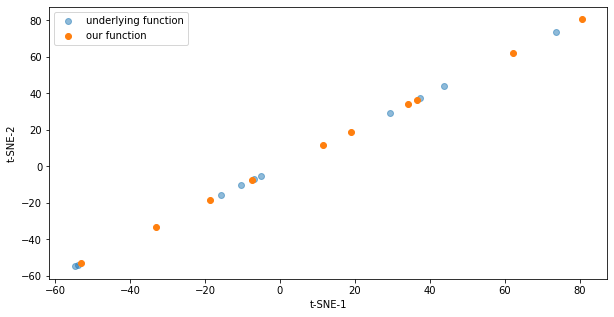

In [302]:
plot_tsne(x, y, linear_model(x))